# <center>Investigação e Análise dos Dados do ENEM 2019 - Desafio Alura </center>
### <center> Fonte-> http://inep.gov.br/web/guest/microdados </center>
### <center> Análise Exploratória dos dados </center> 

## Aula 01

In [1]:
#1- Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#2- Carregando os dados
df_dados = pd.read_csv('C:\\Users\André Lovo\OneDrive\Área de Trabalho\Alura\\Dados_ENEM_2019.csv', engine='python', sep=',',encoding='UTF-8')
#encoding='UTF-8' para ficar com a acentuação certa

#Mostrando os valores
df_dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


### <center> Investigando o Banco de Dados </center>

In [3]:
#3-Verificando o banco de dados e a estrutura
df_dados.shape
#Cada linha é um inscrito no ENEM
#4-Verificando os tipos das informações das colunas
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127380 entries, 0 to 127379
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(24), int64(71), object(41)
memory usage: 132.2+ MB


In [4]:
#Retornando todos os nomes das colunas
df_dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [5]:
# Selecionando duas colunas
df_dados[["SG_UF_RESIDENCIA","Q025"]]

,SG_UF_RESIDENCIA,Q025
0,PA,B
1,PA,B
2,PA,B
3,PA,B
4,PA,B
5,PA,B
6,PA,B
7,PA,A
8,PA,B
9,PA,B


In [6]:
# Selecionando UNICAMENTE os estados
df_dados["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [7]:
# Selecionando UNICAMENTE os estados e contando os valores do dentro do array
len(df_dados["SG_UF_RESIDENCIA"].unique())

27

In [8]:
# Selecionando UNICAMENTE os estados e CONTANDO quantas vezes cada um apareceu (Quantidade de inscritos)
df_dados["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [9]:
#Selecionando e contando as idades dos participantes - A contagem é decrescente (do maior para o menor)
df_dados["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
21     7267
22     5924
23     4668
24     3838
25     3128
26     2717
27     2214
15     2009
28     1967
29     1620
30     1594
31     1460
32     1307
33     1163
34     1029
35      934
36      893
37      890
38      790
39      699
40      642
41      548
42      487
43      442
44      396
      ...  
50      219
52      203
51      186
53      165
54      146
14      141
55      116
56      109
57      100
58       64
59       60
60       48
61       47
63       45
62       39
64       32
67       15
68       14
66       13
65       13
69       12
70        9
13        4
71        4
72        3
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [10]:
#Vamos ordenar as idades de acordo com a idade/index
df_dados["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
18    21452
19    14418
20    10413
21     7267
22     5924
23     4668
24     3838
25     3128
26     2717
27     2214
28     1967
29     1620
30     1594
31     1460
32     1307
33     1163
34     1029
35      934
36      893
37      890
38      790
39      699
40      642
41      548
42      487
      ...  
48      280
49      269
50      219
51      186
52      203
53      165
54      146
55      116
56      109
57      100
58       64
59       60
60       48
61       47
62       39
63       45
64       32
65       13
66       13
67       15
68       14
69       12
70        9
71        4
72        3
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

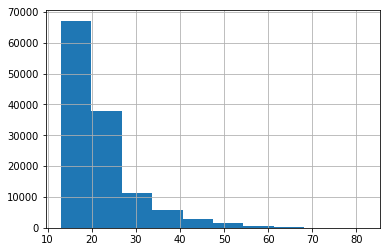

In [11]:
# Visualização para a distribuição das idades
df_dados["NU_IDADE"].hist()


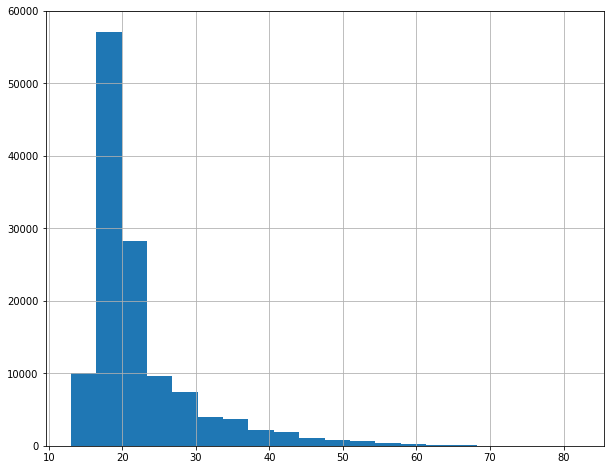

In [12]:
# Visualização para a distribuição das idades e aumentar a quantidade de colunas
df_dados["NU_IDADE"].hist(bins=20, figsize = (10,8))

### Desafio 03: colocar o título no gráfico

Text(0.5,1,'Histograma das idades dos alunos que prestaram o ENEM no Brasil em 2019')

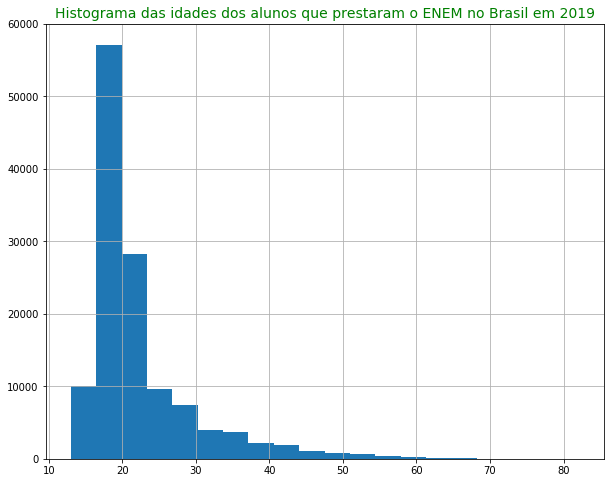

In [13]:
# Visualização para a distribuição das idades e aumentar a quantidade de colunas
df_dados["NU_IDADE"].hist(bins=20, figsize = (10,8))
plt.title('Histograma das idades dos alunos que prestaram o ENEM no Brasil em 2019', fontsize=14, color='green')

In [14]:
# Fazer uma busca onde queremos só os treineiros
df_dados.query("IN_TREINEIRO ==1")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B
12,190001005076,2019,1506138,Redenção,15,PA,15,M,1,3,...,B,A,A,B,B,A,C,A,A,B
14,190001005081,2019,1506807,Santarém,15,PA,17,F,1,3,...,A,A,A,B,A,A,D,A,A,B
16,190001005202,2019,1502301,Capitão Poço,15,PA,17,F,1,3,...,B,A,A,B,B,A,C,A,A,A
27,190001005569,2019,1502103,Cametá,15,PA,16,F,1,1,...,A,A,A,B,A,A,B,A,A,B
37,190001006000,2019,1506559,Santa Luzia do Pará,15,PA,16,M,1,3,...,A,A,A,B,A,A,C,A,A,A
88,190001007949,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,C,B,A,D,A,A,B
90,190001007980,2019,1501402,Belém,15,PA,17,F,1,3,...,B,A,A,B,A,A,D,A,A,B
133,190001009230,2019,1506138,Redenção,15,PA,16,F,1,1,...,A,A,A,B,B,A,B,A,A,B


In [15]:
# Fazer uma busca onde queremos só os treineiros
df_dados.query("IN_TREINEIRO ==1")["IN_TREINEIRO"]

0         1
4         1
12        1
14        1
16        1
27        1
37        1
88        1
90        1
133       1
147       1
170       1
171       1
181       1
186       1
197       1
226       1
231       1
238       1
249       1
287       1
313       1
316       1
322       1
323       1
335       1
347       1
368       1
371       1
372       1
         ..
127049    1
127054    1
127057    1
127086    1
127103    1
127104    1
127153    1
127159    1
127203    1
127207    1
127211    1
127214    1
127233    1
127240    1
127249    1
127258    1
127270    1
127272    1
127273    1
127284    1
127290    1
127309    1
127318    1
127320    1
127326    1
127328    1
127340    1
127349    1
127350    1
127352    1
Name: IN_TREINEIRO, Length: 15401, dtype: int64

In [16]:
# Fazer uma busca onde queremos as idades dos treineiros separados
df_dados.query("IN_TREINEIRO ==1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

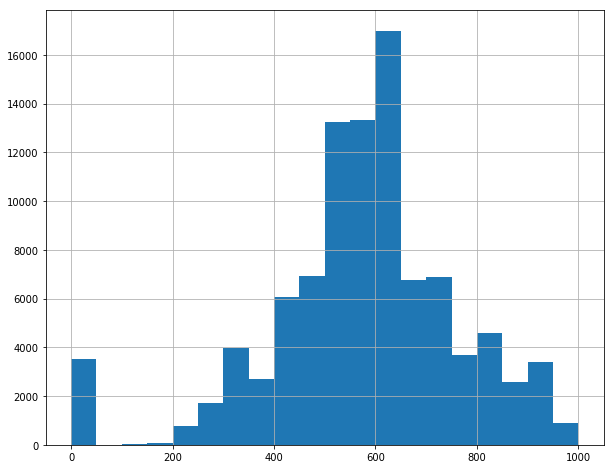

In [17]:
# Vamos plotar um histograma com as notas de Redação
# Aumentado a figura
df_dados["NU_NOTA_REDACAO"].hist(bins=20, figsize=(10,8))

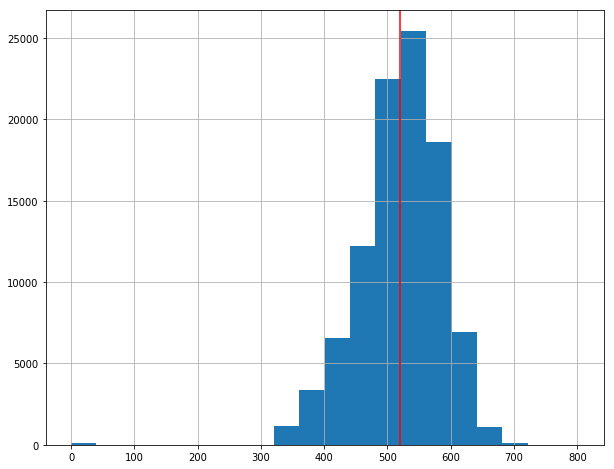

In [18]:
# Vamos plotar um histograma com as notas de linguagens e Códigos
# Aumentado a figura
df_dados["NU_NOTA_LC"].hist(bins=20, figsize=(10,8))
# Calculando o valor médio
media=df_dados["NU_NOTA_LC"].mean()
media
#Adicionando uma linha na ertical com o valor médio
plt.axvline(media,0,1, color='red')

In [19]:
# Buscando a média das notas em Redação
df_dados["NU_NOTA_REDACAO"].mean()

571.5700253970197

In [20]:
# Buscando o Desvio Padrão das notas em Redação
df_dados["NU_NOTA_REDACAO"].std()

188.07645455749753

In [21]:
# Vamos usar o describe para pegar os dados estatísticos das seguintes colunas e notas:
# CN-Ciências Humanas, LC-Linguagens e Códigos, MT-Matemática
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
df_dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [22]:
# Cálculo do Quantil - estamos analisando 10% e passamos o valor de 90%
df_dados["NU_NOTA_LC"].quantile(0.9)
#Qual a quantidade de pessoas que tiraram nota maior que 596.3 (10% das pessoas que tiraram nota maior que 596.3)

596.3

In [23]:
# Cálculo do Quantil - estamos analisando 90% e passamos o valor de 10%
df_dados["NU_NOTA_LC"].quantile(0.1)

434.5

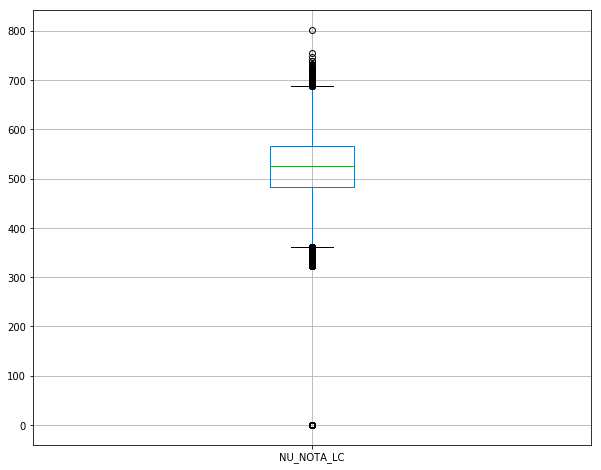

In [24]:
# Entedendo a distribuição usando o gráfico BoxPlot
df_dados["NU_NOTA_LC"].plot.box(grid=True, figsize=(10,8))

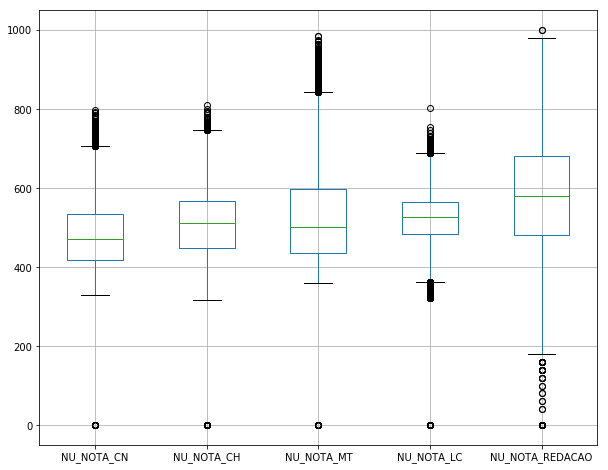

In [25]:
# Entedendo a distribuição usando o gráfico BoxPlot de todas as provas para melhor entendimento
df_dados[provas].plot.box(grid=True, figsize=(10,8))

### Desafio 01: Proporção dos inscritos por idade (Porcentagem)

In [26]:
p = df_dados['NU_IDADE'].values
p

array([17, 23, 35, ..., 22, 26, 19], dtype=int64)

In [27]:
#Porcentagens das idades
P_idades=df_dados["NU_IDADE"].value_counts()
#Cálculos das Porcentagens
Porcentagens=[(P_idades/127380)*100]
Porcentagens

[18    16.840948
 17    16.687078
 19    11.318888
 20     8.174753
 16     6.146962
 21     5.704977
 22     4.650652
 23     3.664626
 24     3.013032
 25     2.455645
 26     2.132988
 27     1.738106
 15     1.577171
 28     1.544198
 29     1.271785
 30     1.251374
 31     1.146177
 32     1.026064
 33     0.913016
 34     0.807819
 35     0.733239
 36     0.701052
 37     0.698697
 38     0.620192
 39     0.548752
 40     0.504004
 41     0.430209
 42     0.382321
 43     0.346993
 44     0.310881
         ...    
 50     0.171927
 52     0.159366
 51     0.146020
 53     0.129534
 54     0.114618
 14     0.110692
 55     0.091066
 56     0.085571
 57     0.078505
 58     0.050243
 59     0.047103
 60     0.037683
 61     0.036897
 63     0.035327
 62     0.030617
 64     0.025122
 67     0.011776
 68     0.010991
 66     0.010206
 65     0.010206
 69     0.009421
 70     0.007065
 13     0.003140
 71     0.003140
 72     0.002355
 75     0.001570
 73     0.001570
 82     0.0007

In [28]:
#Porcentagens das idades = Normalização (Trazer para um padrão, normalização soma total é 1, distribuição normal igual a 1)
df_dados["NU_IDADE"].value_counts(normalize=True)

18    0.168409
17    0.166871
19    0.113189
20    0.081748
16    0.061470
21    0.057050
22    0.046507
23    0.036646
24    0.030130
25    0.024556
26    0.021330
27    0.017381
15    0.015772
28    0.015442
29    0.012718
30    0.012514
31    0.011462
32    0.010261
33    0.009130
34    0.008078
35    0.007332
36    0.007011
37    0.006987
38    0.006202
39    0.005488
40    0.005040
41    0.004302
42    0.003823
43    0.003470
44    0.003109
        ...   
50    0.001719
52    0.001594
51    0.001460
53    0.001295
54    0.001146
14    0.001107
55    0.000911
56    0.000856
57    0.000785
58    0.000502
59    0.000471
60    0.000377
61    0.000369
63    0.000353
62    0.000306
64    0.000251
67    0.000118
68    0.000110
66    0.000102
65    0.000102
69    0.000094
70    0.000071
13    0.000031
71    0.000031
72    0.000024
75    0.000016
73    0.000016
82    0.000008
77    0.000008
76    0.000008
Name: NU_IDADE, Length: 65, dtype: float64


### Desafio 02: Descobrir de quais estados são os inscritos com  13 anos?

In [29]:
# Selecionando os estados com inscritos com idade igual a 13 anos
df_dados.query('NU_IDADE == 13')

# Os estados são: SP, MT, AP e BA.

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
57359,190003297248,2019,3504107,Atibaia,35,SP,13,F,1,1,...,B,A,A,B,A,A,D,B,B,B
95630,190004825557,2019,5107602,Rondonópolis,51,MT,13,M,1,1,...,A,A,A,B,B,A,B,A,A,B
98197,190004926952,2019,1600303,Macapá,16,AP,13,M,1,3,...,B,A,A,C,B,A,E,A,B,B
116501,190005659236,2019,2917508,Jacobina,29,BA,13,M,1,3,...,B,A,A,D,A,B,C,B,C,B


### Desafio 04: Plotar os Histogramas das idades dos treineiros e não treineiros

### Desafio 05: Comparar as distribuições das provas em inglês e espanhol (Duas provas separadas - Plotar no BoxPlot ou Histogramas)

In [30]:
# Fazer uma query separando os dados de quem fez as provas em inglês e espanhol
# Pelo vocabulário 0=Inglês e 1=Espanhol 
# Quantidade total de quem fez IngLês e quem fez Espanhol
df_dados["TP_LINGUA"].value_counts()

1    66809
0    60571
Name: TP_LINGUA, dtype: int64

In [31]:
# Selecionando as linguas escolhidas pelos estudantes inscritos - inglês
ingles = df_dados.query('TP_LINGUA == 0')
ingles

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B
8,190001004986,2019,1502400,Castanhal,15,PA,17,F,1,3,...,B,A,A,C,B,A,E,A,A,B
9,190001004989,2019,1506807,Santarém,15,PA,22,F,1,1,...,A,A,A,B,A,A,E,A,C,B
12,190001005076,2019,1506138,Redenção,15,PA,15,M,1,3,...,B,A,A,B,B,A,C,A,A,B
13,190001005077,2019,1501402,Belém,15,PA,51,F,2,3,...,A,A,A,C,A,A,E,A,A,B
21,190001005327,2019,1501402,Belém,15,PA,42,M,1,1,...,A,A,A,B,B,A,C,A,B,A
24,190001005406,2019,1501402,Belém,15,PA,48,F,0,3,...,A,A,A,B,A,A,D,B,B,B
25,190001005418,2019,1501402,Belém,15,PA,32,M,1,1,...,A,A,A,B,A,A,D,A,B,B
26,190001005484,2019,1504208,Marabá,15,PA,26,M,2,3,...,B,A,A,B,A,A,C,A,B,B
32,190001005761,2019,1502103,Cametá,15,PA,22,F,2,1,...,A,A,A,A,A,A,B,A,B,B


In [32]:
#Distribuição dos alunos que escolheram a lingua inglesa - por inscrição (Ordem de inscrição) - criando um array
ins_i = ingles['NU_INSCRICAO'].values
ins_i

array([190001004776, 190001004986, 190001004989, ..., 190006119987,
       190006120036, 190006120170], dtype=int64)

In [33]:
# Selecionando as linguas escolhidas pelos estudantes inscritos - espanhol
espanhol = df_dados.query('TP_LINGUA == 1')
espanhol

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
5,190001004841,2019,1503606,Itaituba,15,PA,18,F,1,3,...,B,A,A,B,A,A,D,A,B,B
6,190001004856,2019,1501402,Belém,15,PA,21,F,1,3,...,B,A,A,C,A,A,C,B,A,B
7,190001004904,2019,1501402,Belém,15,PA,19,F,1,1,...,A,A,A,B,A,A,B,A,A,A
10,190001005028,2019,1506807,Santarém,15,PA,28,F,2,3,...,A,A,A,B,B,A,B,A,A,A
11,190001005057,2019,1501709,Bragança,15,PA,36,F,1,3,...,A,A,A,B,B,A,B,A,A,B
14,190001005081,2019,1506807,Santarém,15,PA,17,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [34]:
#Distribuição dos alunos que escolheram a lingua espanhola - por inscrição (Ordem de inscrição) - criando um array
ins_e = espanhol['NU_INSCRICAO'].values
ins_e

array([190001004661, 190001004674, 190001004722, ..., 190006120035,
       190006120037, 190006120060], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


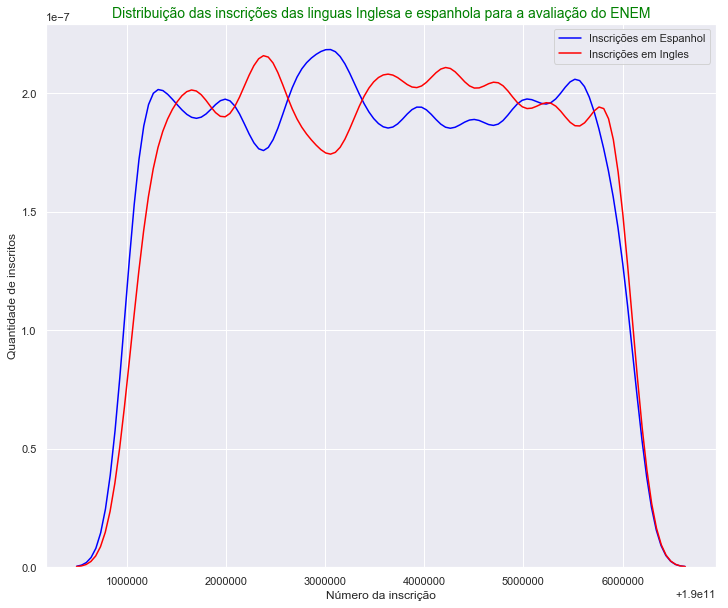

In [35]:
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(ins_e, color='blue', kde= True, rug=False, hist=False, bins='auto', vertical=False, label = "Inscrições em Espanhol")
sns.distplot(ins_i, color='red', kde= True, rug=False, hist=False, bins='auto', vertical=False, label = "Inscrições em Ingles")
plt.title("Distribuição das inscrições das linguas Inglesa e espanhola para a avaliação do ENEM", fontsize=14, color='green')
plt.xlabel("Número da inscrição")
plt.ylabel("Quantidade de inscritos")
plt.show()

In [36]:
#Criando o banco de dados
Linguas = ['Espanhol','Ingles']
Valores = np.array([66809, 60571])

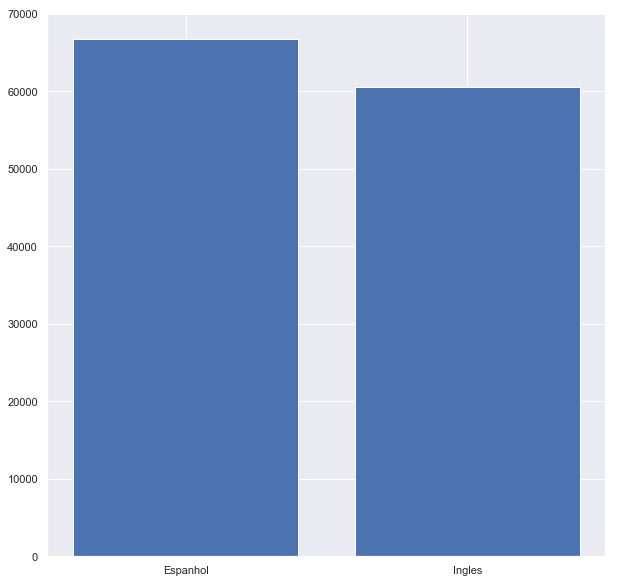

In [37]:
# Aumentando o tamanho dos gráficos
plt.figure(figsize=(10,10))
#Plotando o gráfico de barras
plt.bar(range(0,2),Valores)
#alterando os eixos
plt.xticks(range (0,2),Linguas)# inicio 0 até 2
plt.show()

## Aula 02

In [38]:
#Selecionando os estados com inscritos com idade igual ou menor a 14 anos
df_dados.query('NU_IDADE <= 14')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
310,190001016485,2019,1501402,Belém,15,PA,14,F,1,1,...,A,A,A,B,B,A,C,A,A,A
2818,190001116721,2019,2202406,Capitão de Campos,22,PI,14,F,1,3,...,A,A,A,B,A,A,C,A,A,A
3022,190001124999,2019,2100303,Aldeias Altas,21,MA,14,M,1,3,...,B,A,A,B,B,A,D,A,B,B
5748,190001229936,2019,2908408,Conceição do Coité,29,BA,14,F,1,0,...,A,A,A,B,A,A,C,A,A,A
8845,190001353348,2019,2600104,Afogados da Ingazeira,26,PE,14,F,1,3,...,B,A,A,B,B,A,D,A,B,B
10759,190001431941,2019,2800308,Aracaju,28,SE,14,F,1,0,...,A,A,A,B,B,A,C,A,B,B
11055,190001444767,2019,2922003,Mucuri,29,BA,14,F,1,1,...,C,A,A,C,B,B,D,A,D,B
11985,190001481749,2019,2504009,Campina Grande,25,PB,14,F,1,1,...,B,A,A,C,A,A,C,A,B,B
12082,190001485375,2019,2500403,Alagoa Nova,25,PB,14,M,1,3,...,B,A,A,B,A,A,E,A,A,B
21129,190001847637,2019,3524303,Jaboticabal,35,SP,14,M,1,1,...,B,A,B,D,B,B,D,A,D,B


In [39]:
#Selecionando os estados com inscritos com idade igual ou menor a 14 anos
# Olhando só para os estados
df_dados.query('NU_IDADE <= 14')["SG_UF_RESIDENCIA"].value_counts()

PE    18
CE    15
BA    14
PA    12
MG    11
SP    11
MA     9
PB     7
GO     7
PI     7
AM     4
DF     4
MT     4
PR     3
SE     3
TO     3
RO     2
AL     2
SC     2
AP     1
RJ     1
RN     1
MS     1
RS     1
AC     1
ES     1
Name: SG_UF_RESIDENCIA, dtype: int64

### Desafio 06: Ver estado residente diferente de estado do local da realização da prova

In [40]:
# Selecionando os estados com inscritos com idade igual ou menor a 14 anos
# Olhando só para os estados
# Podemos calcular a porcentagem utilizando o "Normalize=True" 
menor_quatorze=df_dados.query('NU_IDADE <= 14')["SG_UF_RESIDENCIA"].value_counts(normalize=True)
menor_quatorze

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
MG    0.075862
SP    0.075862
MA    0.062069
PB    0.048276
GO    0.048276
PI    0.048276
AM    0.027586
DF    0.027586
MT    0.027586
PR    0.020690
SE    0.020690
TO    0.020690
RO    0.013793
AL    0.013793
SC    0.013793
AP    0.006897
RJ    0.006897
RN    0.006897
MS    0.006897
RS    0.006897
AC    0.006897
ES    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

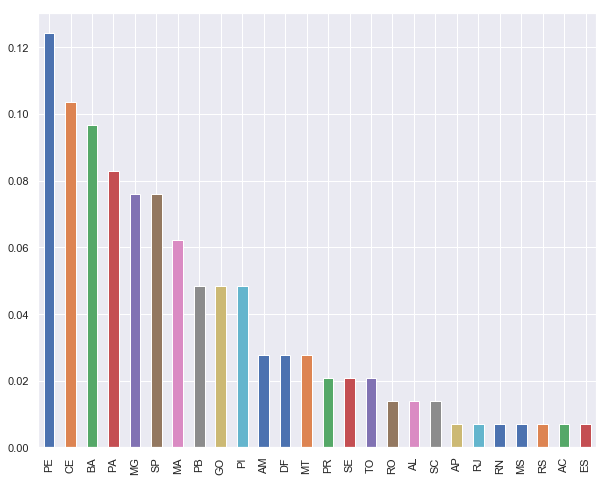

In [41]:
df_dados.query('NU_IDADE <= 14')["SG_UF_RESIDENCIA"].value_counts(normalize=True).plot.bar(figsize=(10,8))

Text(0.5,1,'Gráfico de Boxplot das Notas de Matemática x Renda dos Alunos')

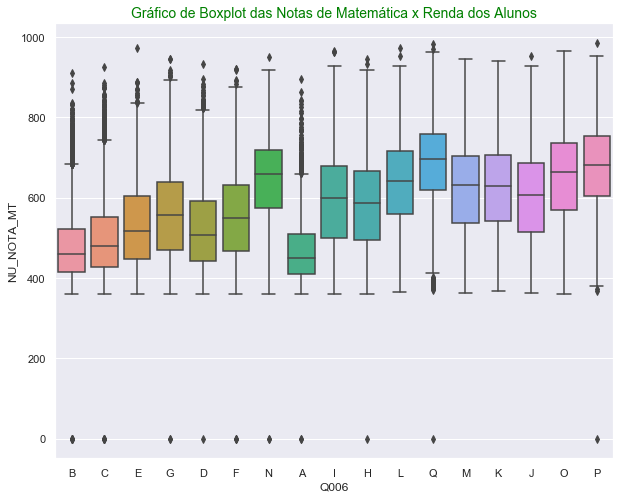

In [42]:
# Vamos plotar usando o boxplot usando o Seaborn
plt.figure(figsize=(10,8))
#shif tab(mostra como programar)
sns.boxplot(x="Q006", y="NU_NOTA_MT", data = df_dados)
plt.title("Gráfico de Boxplot das Notas de Matemática x Renda dos Alunos", fontsize=14, color='green')

In [43]:
#Para ordenar o gráfico:
#1-Criar um vetor ordenado
renda_ordenada=df_dados["Q006"].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

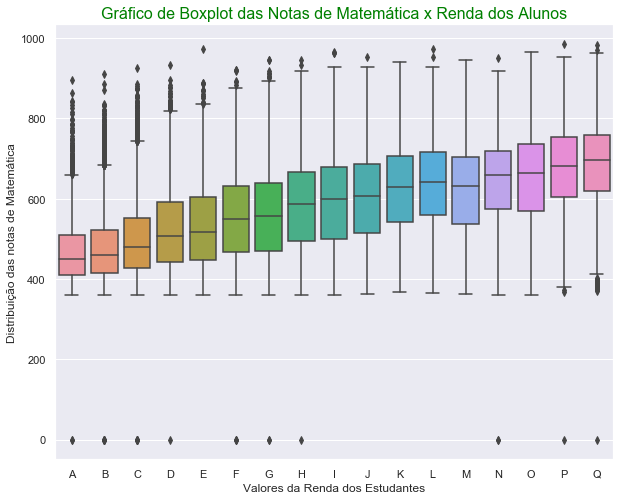

In [44]:
# Vamos plotar usando o boxplot usando o Seaborn
plt.figure(figsize=(10,8))
#shif tab(mostra como programar)
sns.boxplot(x="Q006", y="NU_NOTA_MT", data = df_dados, order = renda_ordenada)
plt.title("Gráfico de Boxplot das Notas de Matemática x Renda dos Alunos", fontsize=16, color='green')
plt.xlabel("Valores da Renda dos Estudantes")
plt.ylabel("Distribuição das notas de Matemática")
plt.show()

In [45]:
# Vamos Analisar o comportamento de todas as Notas
# Vamos somar todas as notas das provas
df_dados[provas].sum()
#O sistema buscou a soma total de todas as provas (Ele somou as colunas...Mas não é isso que queremos...)
# Queremos a soma de cada inscrito...Assim temos que somar as linhas

NU_NOTA_CN         44334986.1
NU_NOTA_CH         49743676.1
NU_NOTA_MT         48563933.8
NU_NOTA_LC         51027844.9
NU_NOTA_REDACAO    56038440.0
dtype: float64

In [46]:
#Somando as linhas (As provas de cada aluno) - axis=1 - eixo x (linhas) e axis=0 (Colunas)
# Vamos somar todas as notas das provas
df_dados[provas].sum(axis=1)
#Criando uma nova coluna com a Nota Total de cada aluno (inscrito)
df_dados["NU_NOTA_TOTAL"]=df_dados[provas].sum(axis=1)
df_dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


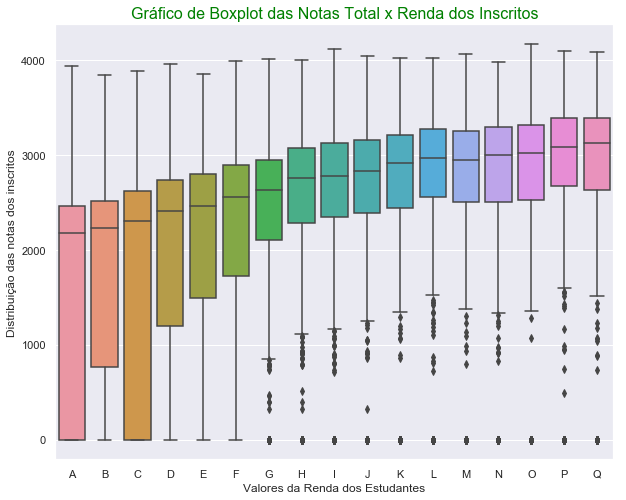

In [47]:
# Vamos plotar usando o boxplot usando o Seaborn
plt.figure(figsize=(10,8))
#shif tab(mostra como programar)
sns.boxplot(x="Q006", y="NU_NOTA_TOTAL", data = df_dados, order = renda_ordenada)
plt.title("Gráfico de Boxplot das Notas Total x Renda dos Inscritos", fontsize=16, color='green')
plt.xlabel("Valores da Renda dos Estudantes")
plt.ylabel("Distribuição das notas dos inscritos")
plt.show()

## Desafio 07: Crair uma função que plote o gráfico BoxPlot do seaborn

In [52]:
sns.__version__

'0.9.0'

In [49]:
#pip3 install seaborn==0.11.0

In [53]:
sns.distplot(df_dados, x="NU_NOTA_TOTAL")

TypeError: distplot() got an unexpected keyword argument 'x'

In [ ]:
#Fazendo uam análise dos dados Zero na soma das provas
#provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
#provas.appened("NU_NOTAS_TOTAL")
#df_dados[provas].query("NU_NOTAS_TOTAL == 0")

## Aula 03

In [ ]:
# Distribuicao e Correlacao